## Import the required libraries and the utility modules

In [12]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.python.keras.utils.np_utils import to_categorical

import matplotlib.pyplot as plt

#Custom libraries
#Data formating library
from dataloadinglibrary import loadCSV

from datainspectionlibrary import getStatisticsOfData

from dataformatinglibrary import createExcelFromArray

from defineInputs import getLabelName
from defineInputs import getPathToTrainingAndTestingDataSets
from defineInputs import modelPerformanceReport
from defineInputs import defineArrayForPreProcessing
from defineInputs import getPathToGenerateModels

from util import performPreprocessing

### Load the training dataset and check the statistics

In [2]:
#Define file names and call loadCSV to load the CSV files
trainingFileNameWithAbsolutePath, testingFileNameWithAbsolutePath = getPathToTrainingAndTestingDataSets()
trainingDataSet = loadCSV(trainingFileNameWithAbsolutePath)
difficultyLevel = trainingDataSet.pop('difficulty_level')
labelName = getLabelName()
label = trainingDataSet[labelName]

#Look at the statistics of the dataSet
getStatisticsOfData(trainingDataSet)
print("\n***** Here is how to training dataset looks like before performing any pre-processing *****")
trainingDataSet.head()

***** Start checking the statistics of the dataSet *****

***** Shape (number of rows and columns) in the dataset:  (25191, 42)
***** Total number of features in the dataset:  41
***** Number of categorical features in the dataset:  3
***** Number of numerical features in the dataset:  38

***** Names of categorical features in dataset *****

| Categorical features in dataset   |
|-----------------------------------|
| Protocol_type                     |
| Service                           |
| Flag                              |


***** Names of numerical features in dataset *****

| Numerical features in the dataset   |
|-------------------------------------|
| Duration                            |
| Src_bytes                           |
| Dst_bytes                           |
| Land                                |
| Wrong_fragment                      |
| Urgent                              |
| Hot                                 |
| Num_failed_logins                   |
| Logged_in

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,attack_type
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


### Load the testing dataset and check the statistics

In [3]:
#Define file names and call loadCSV to load the CSV files
testingDataSet = loadCSV(testingFileNameWithAbsolutePath)
difficultyLevel = testingDataSet.pop('difficulty_level')

#Look at the statistics of the dataSet
getStatisticsOfData(testingDataSet)
print("\n***** Here is how to testing dataset looks like before performing any pre-processing *****")
testingDataSet.head()

***** Start checking the statistics of the dataSet *****

***** Shape (number of rows and columns) in the dataset:  (11850, 42)
***** Total number of features in the dataset:  41
***** Number of categorical features in the dataset:  3
***** Number of numerical features in the dataset:  38

***** Names of categorical features in dataset *****

| Categorical features in dataset   |
|-----------------------------------|
| Protocol_type                     |
| Service                           |
| Flag                              |


***** Names of numerical features in dataset *****

| Numerical features in the dataset   |
|-------------------------------------|
| Duration                            |
| Src_bytes                           |
| Dst_bytes                           |
| Land                                |
| Wrong_fragment                      |
| Urgent                              |
| Hot                                 |
| Num_failed_logins                   |
| Logged_in

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,attack_type
0,13,tcp,telnet,SF,118,2425,0,0,0,0,...,10,0.38,0.12,0.04,0.0,0.00,0.00,0.12,0.3,guess_passwd
1,0,udp,private,SF,44,0,0,0,0,0,...,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,snmpguess
2,0,tcp,telnet,S3,0,44,0,0,0,0,...,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,processtable
3,0,udp,private,SF,53,55,0,0,0,0,...,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal
4,0,tcp,private,SH,0,0,0,0,0,0,...,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,nmap


### Perform pre-processing

In [4]:
arrayOfModels = defineArrayForPreProcessing()
completeEncodedAndScaledDataset = performPreprocessing(trainingDataSet, testingDataSet, arrayOfModels)
completeEncodedAndScaledDataset.head()

[['ExtraTreesClassifier', 'OneHotEncoder', 'Standardization']]
***************************************************************************************************************************
********************************************* Building Model- 0  As Below *************************************************
	 -- Feature Selection: 	  ExtraTreesClassifier  
	 -- Feature Encoding: 	  OneHotEncoder  
	 -- Feature Scaling: 	  Standardization 

completeDataSet.shape:  (37041, 43)
completeDataSet.head:     Duration Protocol_type  Service Flag  Src_bytes  Dst_bytes  Land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   Wrong_fragment  Urgent  Hot  ...  Dst_host_same_srv_rate  \
0    

,Protocol_type,Service,Flag,Src_bytes,Logged_in,Count,Serror_rate,Srv_serror_rate,Rerror_rate,Same_srv_rate,...,Dst_host_count,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,difficulty_level,attack_type
0,2.038571,0.629977,0.735369,-0.011190,-0.732914,-0.581217,-0.556584,-0.552030,-0.460806,-1.421427,...,0.656445,-1.050270,-1.193023,2.187298,2.137976,-0.561390,-0.549814,-0.487765,-0.853801,normal
1,-0.154786,0.938904,-0.660992,-0.011262,-0.732914,0.275339,1.851192,1.851769,-0.460806,-1.491319,...,0.656445,-0.821669,-0.966271,-0.237144,-0.498320,1.904034,1.899674,-0.487765,0.228139,neptune
2,-0.154786,-0.543948,0.735369,-0.011147,1.364417,-0.643512,-0.075029,-0.071270,-0.460806,0.721924,...,-1.709884,1.272317,1.074493,-0.457548,-0.408446,-0.487427,-0.525319,-0.487765,0.769108,normal
3,-0.154786,-0.543948,0.735369,-0.011163,1.364417,-0.448840,-0.556584,-0.552030,-0.460806,0.721924,...,0.656445,1.272317,1.074493,-0.457548,-0.498320,-0.561390,-0.549814,-0.487765,0.769108,normal
4,-0.154786,0.938904,-2.057353,-0.011262,-0.732914,0.259766,-0.556584,-0.552030,2.274941,-1.235049,...,0.656445,-0.885678,-1.034297,-0.148983,-0.498320,-0.561390,-0.549814,2.476323,0.769108,neptune


### After preprocessing, check the shape of the dataset

In [5]:
x = completeEncodedAndScaledDataset.drop('attack_type',axis=1)
y = completeEncodedAndScaledDataset['attack_type']
print(x.shape, y.shape)
print('Number of unique values in label: ',len(np.unique(y)))
print('Unique values in label: ',np.unique(y))
#print(y.value_counts())

(37041, 20) (37041,)
Number of unique values in label:  40
Unique values in label:  ['apache2' 'back' 'buffer_overflow' 'ftp_write' 'guess_passwd'
 'httptunnel' 'imap' 'ipsweep' 'land' 'loadmodule' 'mailbomb' 'mscan'
 'multihop' 'named' 'neptune' 'nmap' 'normal' 'perl' 'phf' 'pod'
 'portsweep' 'processtable' 'ps' 'rootkit' 'saint' 'satan' 'sendmail'
 'smurf' 'snmpgetattack' 'snmpguess' 'spy' 'sqlattack' 'teardrop'
 'udpstorm' 'warezclient' 'warezmaster' 'worm' 'xlock' 'xsnoop' 'xterm']


### Encode the categorical label values

In [6]:
onehot = pd.get_dummies(y)
y = onehot.as_matrix()
print(x.shape, y.shape)

(37041, 20) (37041, 40)


D:\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


## Build a neural Network model

In [7]:
'''
This function is used to define, compile and filt a neural network
'''
def nn_model(trainx, trainy, valx,valy,bt_size,epochs, layers):
  model = Sequential()
  model.add(Dense(layers[0],activation='relu', input_shape=(trainx.shape[1],)))
  for l in layers[1:]:
    model.add(Dense(l, activation='relu' ))
    model.add(Dropout(0.30))
  model.add(Dense(trainy.shape[1], activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  hist=model.fit(trainx, trainy, batch_size=bt_size, epochs=epochs, shuffle=True, validation_data=(valx,valy), verbose=True)
  return hist

In [8]:
trainx, testx, trainy, testy = train_test_split(x,y, test_size=0.25, random_state=42)
layers=[trainx.shape[1],800,500,400,300,200,100,50,10]
hist = nn_model(trainx, trainy, testx, testy,16,100,layers)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 27780 samples, validate on 9261 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
27780/27780 [==============================] - 12s 420us/sample - loss: 1.0481 - acc: 0.7006 - val_loss: 0.6489 - val_acc: 0.7742
Epoch 2/100
27780/27780 [==============================] - 11s 381us/sample - loss: 0.7296 - acc: 0.7751 - val_loss: 0.5398 - val_acc: 0.8213
Epoch 3/100
27780/27780 [==============================] - 11s 385us/sample - loss: 0.6316 - acc: 0.7992 - val_loss: 0.4577 - val_acc: 0.8402
Epoch 4/100
27780/27780 [==============================] - 11s 392us/sample - loss: 0.5731 - acc: 0.8157 - val_loss: 0.4002 - val_acc: 0.8790
Epoch 5/100
27780/27780 [==============================] - 11s 386us/sample - loss: 0.5312 - acc: 0.8364 - val_loss: 0.3762 - val_acc: 0.8743
Epoch 

Epoch 52/100
27780/27780 [==============================] - 11s 383us/sample - loss: 0.5021 - acc: 0.8807 - val_loss: 0.2870 - val_acc: 0.9158
Epoch 53/100
27780/27780 [==============================] - 11s 383us/sample - loss: 0.4962 - acc: 0.8730 - val_loss: 0.2757 - val_acc: 0.9199
Epoch 54/100
27780/27780 [==============================] - 11s 383us/sample - loss: 0.4674 - acc: 0.8850 - val_loss: 0.2959 - val_acc: 0.9132
Epoch 55/100
27780/27780 [==============================] - 11s 384us/sample - loss: 0.5025 - acc: 0.8792 - val_loss: 0.3102 - val_acc: 0.9173
Epoch 56/100
27780/27780 [==============================] - 11s 385us/sample - loss: 0.5713 - acc: 0.8688 - val_loss: 0.2990 - val_acc: 0.9135
Epoch 57/100
27780/27780 [==============================] - 11s 384us/sample - loss: 0.4880 - acc: 0.8781 - val_loss: 0.3754 - val_acc: 0.9047
Epoch 58/100
27780/27780 [==============================] - 11s 383us/sample - loss: 0.5401 - acc: 0.8740 - val_loss: 0.3097 - val_acc: 0.9072

In [9]:
print('MAX Accuracy during training: ',max(hist.history['acc'])*100)
print('MAX Accuracy during validation: ',max(hist.history['val_acc'])*100)

MAX Accuracy during training:  89.22966122627258
MAX Accuracy during validation:  92.46301651000977


## Polt the training accuracy and testing accuracy

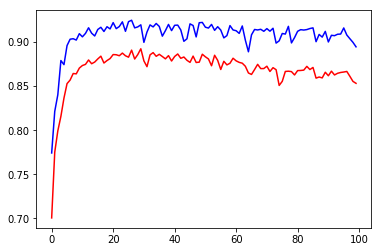

In [13]:
plt.plot(range(100), hist.history['acc'], 'r', label='Train acc')
plt.plot(range(100), hist.history['val_acc'], 'b', label='Test acc')

## Polt the training loss and testing loss

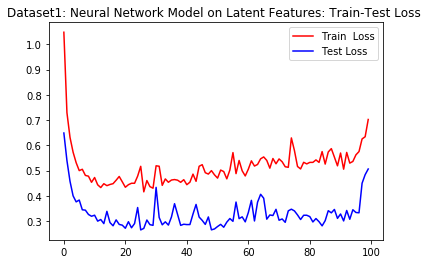

In [14]:
plt.plot(range(100), hist.history['loss'], 'r', label='Train  Loss')
plt.plot(range(100), hist.history['val_loss'], 'b', label='Test Loss')
plt.title("Dataset1: Neural Network Model on Latent Features: Train-Test Loss ")
plt.legend()